## Assignment-2 Data Preprocessing and feature engineering- Phase-2

In [52]:
#############################################
# FEATURE ENGINEERING & DATA PRE-PROCESSING
#############################################
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler


In [54]:

# Load the Iris dataset
df = sns.load_dataset('iris')


print(df.shape) 


(150, 5)


In [56]:
# Basic info
print(df.info())

# Statistical summary
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

In [58]:
# Checking for missing values
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


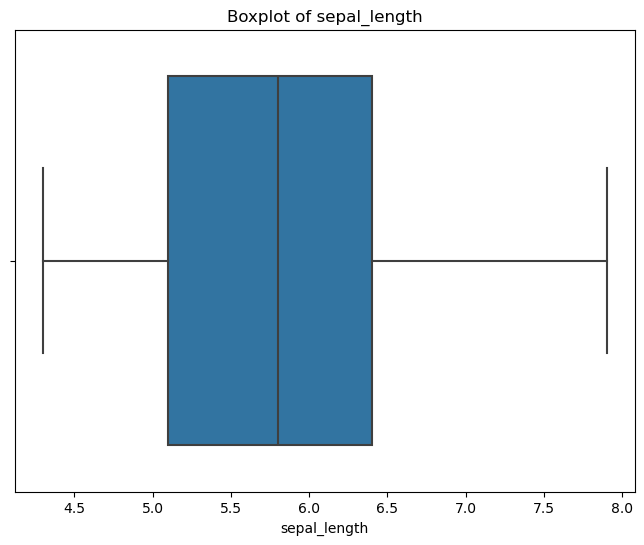

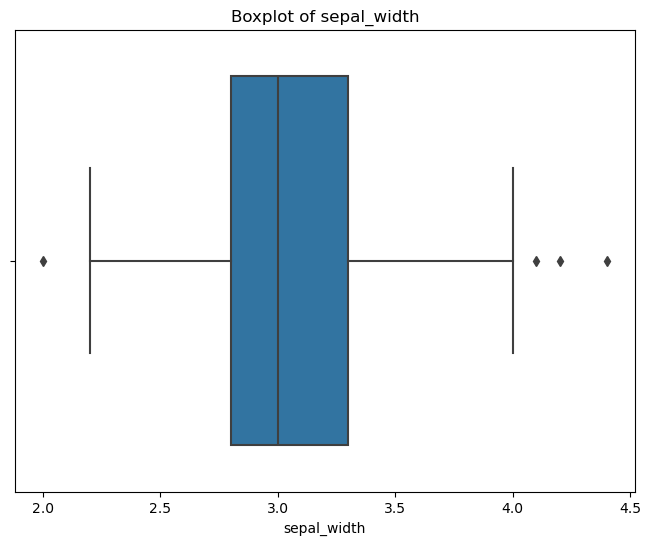

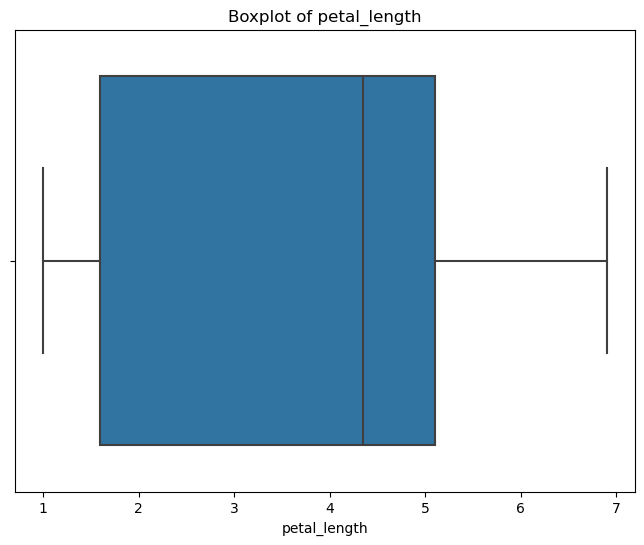

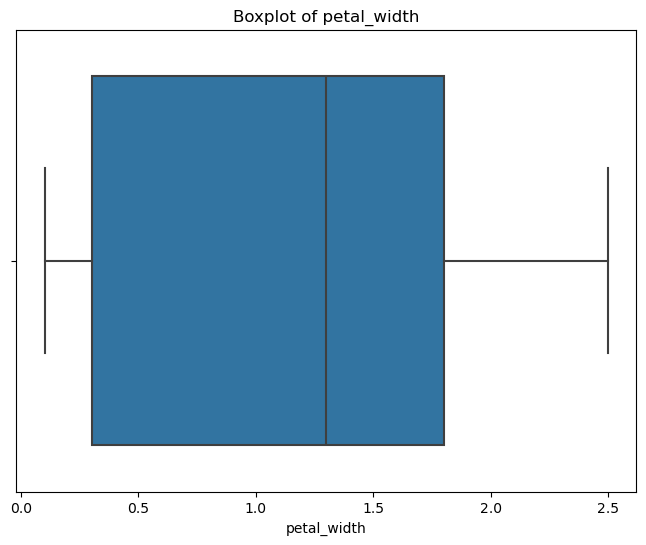

In [60]:

# Create boxplots for each numerical column
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plotting the boxplots
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [62]:
# Detect outliers using the IQR method
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit



In [64]:
# Check outliers for each numerical column
num_cols = df.select_dtypes(include=['float64']).columns
for col in num_cols:
    low, up = outlier_thresholds(df, col)
    print(f'{col} outliers below {low} and above {up}')



sepal_length outliers below 3.1499999999999986 and above 8.350000000000001
sepal_width outliers below 2.05 and above 4.05
petal_length outliers below -3.649999999999999 and above 10.349999999999998
petal_width outliers below -1.95 and above 4.05


In [66]:
# Replace outliers with thresholds
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    replace_with_thresholds(df, col)

In [68]:
# Standardize the numerical features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


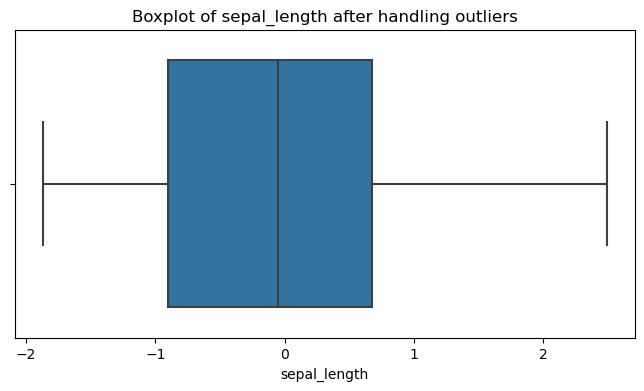

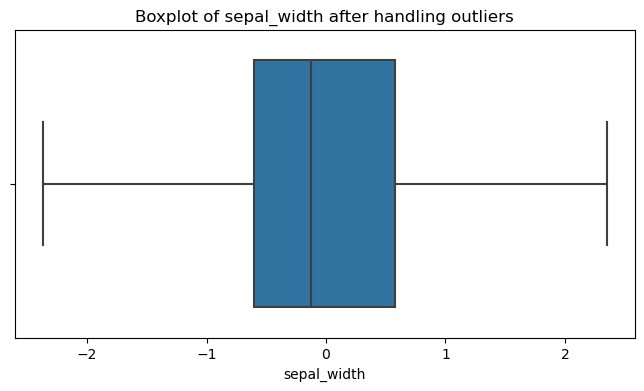

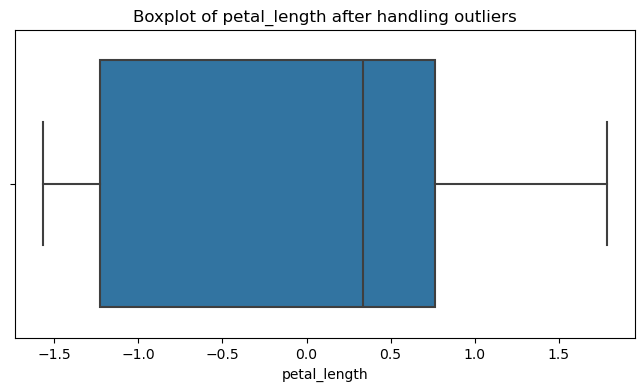

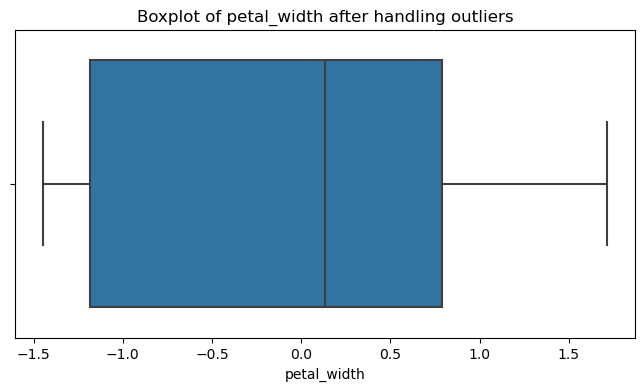

In [70]:
# Plot boxplots to visualize outliers
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} after handling outliers')
    plt.show()
